# Introduction 

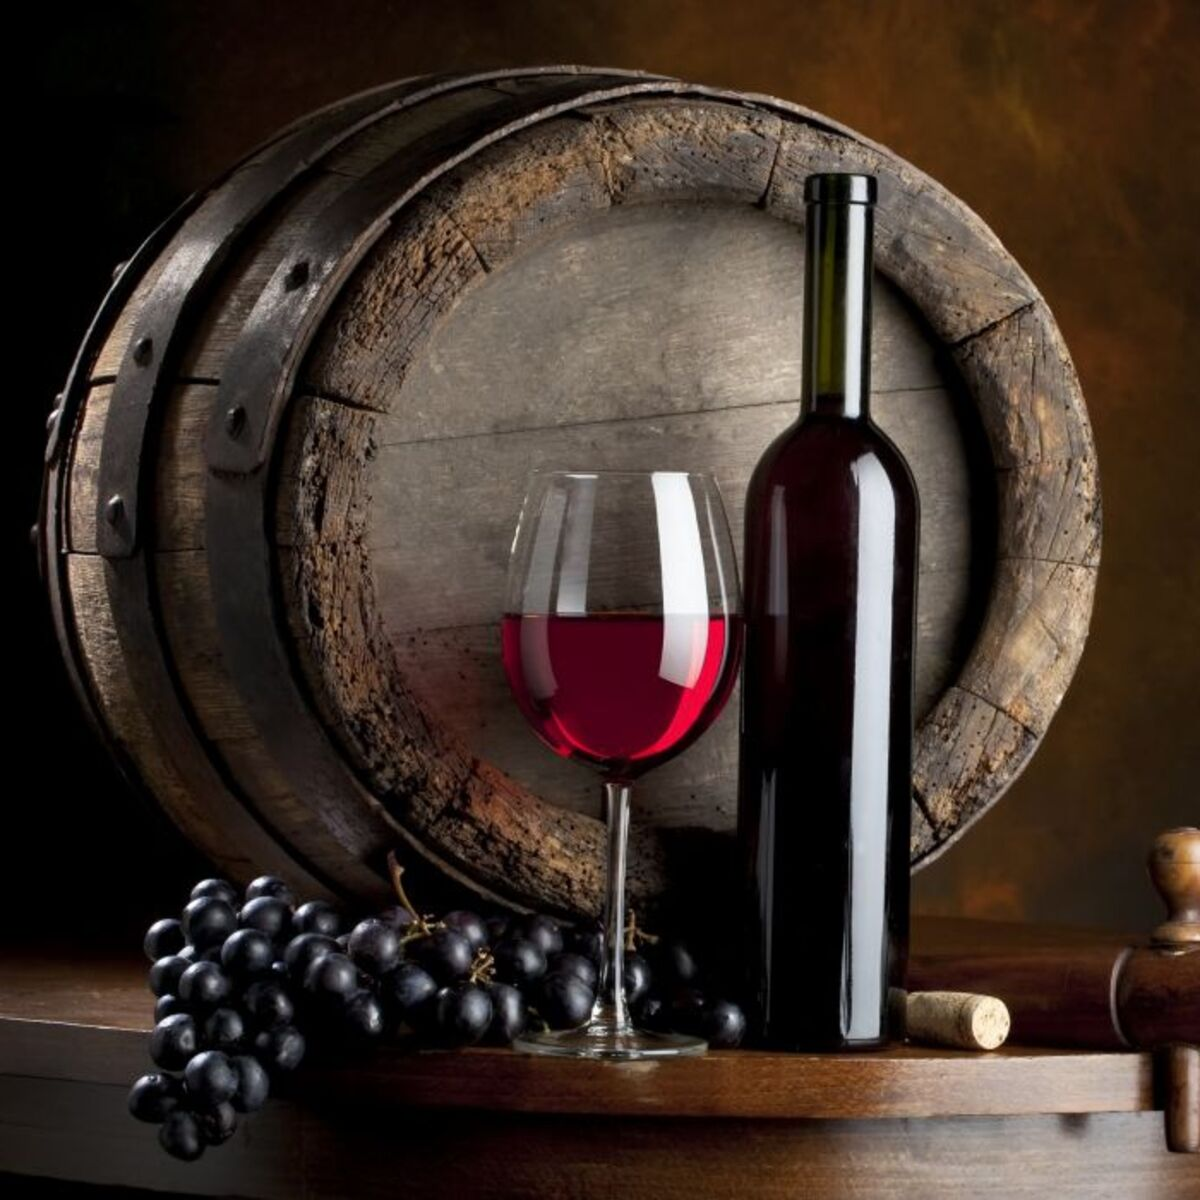

## Abstract: The data is related with the information of different wineries and their wines and we want to fit a regression model to predict the price of each bottle.

### Attribute Information

* winery: Winery name
* wine: Name of the wine
* year: Year in which the grapes were harvested
* rating: Average rating given to the wine by the users [from 1-5]
* num_reviews: Number of users that reviewed the wine
* country: Country of origin
* region: Region of the wine
* price: Price in euros
* type: Wine variety
* body: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]
* acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-3]

## Importing the Libraries

In [817]:
#library used for data manipulation and analysis
import pandas as pd

# library used for working with arrays.
import numpy as np

# library for plots and visualisations
import matplotlib.pyplot as plt

# library for visualisations
import seaborn as sns

%matplotlib inline 
# to restrict the float value to 2 decimal places

# Warning Suppression
import warnings
warnings.filterwarnings("ignore")

# Setting Display options to ensure feature name visibility
pd.set_option("display.max_columns",None)

## Importing Data

In [818]:
data_wine = pd.read_csv("wines_SPA.csv")

In [819]:
# Fetching Top 10 rows

data_wine.head(10)

winery                            wine  year  rating  num_reviews  \
0  Teso La Monja                           Tinto  2013     4.9           58   
1         Artadi                   Vina El Pison  2018     4.9           31   
2   Vega Sicilia                           Unico  2009     4.8         1793   
3   Vega Sicilia                           Unico  1999     4.8         1705   
4   Vega Sicilia                           Unico  1996     4.8         1309   
5   Vega Sicilia                           Unico  1998     4.8         1209   
6   Vega Sicilia                           Unico  2010     4.8         1201   
7   Vega Sicilia                           Unico  1995     4.8          926   
8   Vega Sicilia  Unico Reserva Especial Edicion  2015     4.8          643   
9   Vega Sicilia                           Unico  2011     4.8          630   

  country            region   price                  type  body  acidity  
0  Espana              Toro  995.00              Toro Red   5.0      3.0  
1  Espana    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Espana  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Espana  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Espana  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  
5  Espana  Ribera del Duero  490.00  Ribera Del Duero Red   5.0      3.0  
6  Espana  Ribera del Duero  349.00  Ribera Del Duero Red   5.0      3.0  
7  Espana  Ribera del Duero  810.89  Ribera Del Duero Red   5.0      3.0  
8  Espana  Ribera del Duero  345.00  Ribera Del Duero Red   5.0      3.0  
9  Espana  Ribera del Duero  315.00  Ribera Del Duero Red   5.0      3.0

In [820]:
# Fetching last 10 records

data_wine.tail(10)

winery             wine  year  rating  num_reviews  \
7490              Binigrau           Nounat  2020     4.2          404   
7491          Ramon Bilbao            Mirto  2011     4.2          402   
7492                 Matsu         El Viejo  2019     4.2          400   
7493                Artadi       Valdegines  2016     4.2          398   
7494               Contino   Rioja Graciano  2011     4.2          395   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region  price                  type  body  acidity  
7490  Espana          Mallorca  19.90                   NaN   NaN      NaN  
7491  Espana             Rioja  28.53             Rioja Red   4.0      3.0  
7492  Espana              Toro  27.89              Toro Red   5.0      3.0  
7493  Espana    Vino de Espana  48.96           Tempranillo   4.0      2.0  
7494  Espana             Rioja  61.94             Rioja Red   4.0      3.0  
7495  Espana             Rioja  19.98             Rioja Red   4.0      3.0  
7496  Espana          Priorato  16.76           Priorat Red   4.0      3.0  
7497  Espana      El Terrerazo  24.45                   Red   4.0      3.0  
7498  Espana  Ribera del Duero  64.50  Ribera Del Duero Red   5.0      3.0  
7499  Espana  Ribera del Duero  31.63  Ribera Del Duero Red   5.0      3.0

In [821]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: total: 0 ns
Wall time: 0 ns


In [822]:
data_wine.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [823]:
print(start+"Shape of the Dataset:"+end,data_wine.shape,"\n")

Shape of the Dataset: (7500, 11) 



In [824]:
print(start+"Summary of the dataset:"+end,'\n')
data_wine.info()

Summary of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


* Data has int,float and object values in the dataset.
* Data type of year column is object,we need to convert it in numerical type.
* There appears to be missing values in many columns of the dataset.

### Defining a function to convert datatype of year column

In [825]:
def func(x):
    try :
        return int(x)
    except ValueError:
        return x
l = data_wine['year'].apply(func)
l = [*map(lambda x : type(x) == str, l.tolist())]

print(data_wine.loc[l, 'year'])

data_wine.loc[l, 'year'] = np.NaN
data_wine['year'] = data_wine.year.values.astype(float)

20      N.V.
133     N.V.
142     N.V.
143     N.V.
267     N.V.
        ... 
7388    N.V.
7413    N.V.
7438    N.V.
7463    N.V.
7488    N.V.
Name: year, Length: 288, dtype: object


In [826]:
print(start+"Checking for null values count column-wise"+end,'\n',data_wine.isnull().sum(),'\n')

Checking for null values count column-wise 
 winery            0
wine              0
year            290
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64 



* There are null values in the year,type,body and acidity column.

## Dealing with Missing values 

### Filling the misssing value in the type column with the mode

In [827]:
data_wine["type"] = data_wine["type"].fillna(data_wine["type"].mode()[0])

### Filling the missing value in numerical variable using Median

In [828]:
for i in ['year','body','acidity']:
    data_wine[i] = data_wine[i].fillna(data_wine[i].median())

In [829]:
## Verifying the changes 

data_wine.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

* We have successfully imputed all the missing values

## Looking into the values in each column

In [830]:
#function for getting insigt for each column values
def values_in_columns(data_wine):
    for i in data_wine.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',data_wine[i].nunique(),'\n')
        print('Count of each unique value \n',data_wine[i].value_counts(),'\n')

In [831]:
# calling the function

values_in_columns(data_wine)

Column Name--->winery
Number of Unique Values 480 

Count of each unique value 
 Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64 

Column Name--->wine
Number of Unique Values 847 

Count of each unique value 
 Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                

## Checking the duplicate values if any

In [832]:
duplicates = data_wine.duplicated().sum()
print(start+"Number of duplicates in the dataset"+end,duplicates,'\n')

Number of duplicates in the dataset 5467 



In [833]:
per = round((data_wine.duplicated().sum()/data_wine.shape[0])*100,2)
per

72.89

* It is almost 73 % of our values.

In [834]:
# Analysis for duplicate rows

l = {}
for j in range(4000, 4200):
    val = data_wine.iloc[j].values
    l[j] = []
    for i, row in enumerate(data_wine.values):
        if [*row] == [*val]: l[j].append(i)  
            
data_wine.iloc[l[4002]]

winery    wine    year  rating  num_reviews country  \
2002  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
2027  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
2052  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
2077  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
2102  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
...         ...     ...     ...     ...          ...     ...   
7378  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
7403  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
7428  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
7453  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   
7478  Clos Pons  Roc Nu  2011.0     4.2          420  Espana   

                 region  price type  body  acidity  
2002  Costers del Segre  23.95  Red   4.0      3.0  
2027  Costers del Segre  23.95  Red   4.0      3.0  
2052  Costers del Segre  23.95  Red   4.0      3.0  
2077  Costers del Segre  23.95  Red   4.0      3.0  
2102  Costers del Segre  23.95  Red   4.0      3.0  
...                 ...    ...  ...   ...      ...  
7378  Costers del Segre  23.95  Red   4.0      3.0  
7403  Costers del Segre  23.95  Red   4.0      3.0  
7428  Costers del Segre  23.95  Red   4.0      3.0  
7453  Costers del Segre  23.95  Red   4.0      3.0  
7478  Costers del Segre  23.95  Red   4.0      3.0  

[220 rows x 11 columns]

* It seems that every data point is repeated almost each 25 row, which explains the reason for all this amount of duplicates.
* So, We need to remove all these duplicates

## Dropping duplicate rows

In [835]:
data_wine = data_wine.drop(data_wine[data_wine.duplicated()].index, axis=0)
data_wine.reset_index()
print(f'Number of Duplicates: {data_wine.duplicated().sum()}')

Number of Duplicates: 0


* We have no duplicates in our data. 

## Analyzing the Data

In [836]:
data_wine.describe().T

count         mean          std      min     25%     50%  \
year         2033.0  2011.272996    11.044993  1910.00  2010.0  2015.0   
rating       2033.0     4.402607     0.146542     4.20     4.3     4.4   
num_reviews  2033.0   575.239547  1381.146095    25.00    57.0   140.0   
price        2033.0   136.004267   273.029742     4.99    32.0    53.9   
body         2033.0     4.226267     0.616345     2.00     4.0     4.0   
acidity      2033.0     2.931136     0.314009     1.00     3.0     3.0   

                75%       max  
year         2017.0   2021.00  
rating          4.5      4.90  
num_reviews   490.0  32624.00  
price         110.0   3119.08  
body            5.0      5.00  
acidity         3.0      3.00

- 'year' value ranges from 1910 to 2021.As mean < median, we can say that it is **slightly left skewed.
* 'rating' ranges from 4.2 to 4.9.As mean and median are almost equal, we can say that it is **almost Normal Distributed.
* 'num_reviews' ranges from 25 to 32624.As mean is almost 4 times as of median , we can say that it is **Highly rightly skewed.
* Also in this column we have very big difference between the 3rd quartile and maximum value , their is very high chances of having outliers.
* 'price' ranges from 4.99 to 3119.mean is more than twice as that of median , it is **Highly rightly skewed.
* Also in this column we have very big difference between the 3rd quartile and maximum value , their is very high chances of having outliers.
* 'body' value ranges from 2 to 5 . Mean is slightly greater than median , it is **slightly right skewed.
* Also in this column we can observe big difference between the 1st quartile and minimum value , their is very high chances of having outliers.
* 'acidity' ranges from 1 to 3 . Mean ~ Median , we can say that it is **almost Normal Distributed.

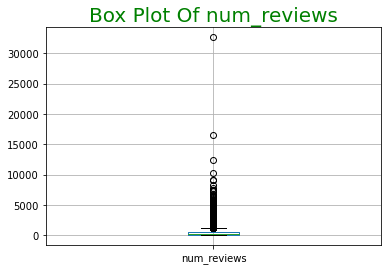

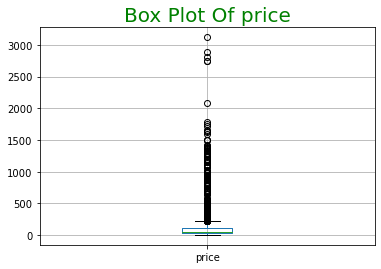

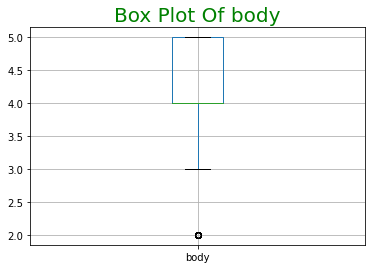

In [837]:
# Plotting box plot for visualizing outliers in columns

columns = ['num_reviews','price','body']
for i in columns:
    data_wine.iloc[:,:].boxplot(column = i)
    plt.title(f"Box Plot Of {i}" , fontsize=20,
          color="green")
    plt.show()

* We can clearly see that there is outliers present in all these 3 columns.

## Handling outliers with z-score

In [838]:
# function for dropping outliers

def drop_outliers_zscore(dfcopy:pd.DataFrame, cols, threshold:int=3, inplace:bool=False):
    '''
    input:  dfcopy            ==> the dataframe that contains outliers
            cols  list / str  ==> list of strings (names of columns that have outliers)
            inplace           ==> if True,  method will edit the original dataframe
                                if False, method will return the new dataframe
            threshold         ==> maximum and minimun threshold of zscore
    
    output: df:        ==>clean dataframe
    this method drops outliers from data using zscore method
    '''
    if inplace:
        global data_wine
    else:
        data_wine = dfcopy.copy()

    def drop_col(df_, col):
        
        mean, std = np.mean(df_[col]), np.std(df_[col])
        df_['is_outlier'] = df_[col].apply(lambda x : np.abs((x - mean) / std) > threshold)
        outliers_idx = df_.loc[df_['is_outlier']].index
        df_ = df_.drop(outliers_idx, axis=0)
        
        data_wine = df_.drop('is_outlier', axis=1)
        return data_wine

    
    if type(cols) == str:
        data_wine = drop_col(data_wine, cols)
    elif type(cols) == list:
        for col in cols:
            data_wine = drop_col(data_wine, col)
    else :
        raise ValueError('Pass neither list nor string in {Cols}')
    
    if inplace:
        
        dfcopy = data_wine
    else:
        return data_wine
    
THRESHOLD = 4
num_outlier_records =  data_wine.shape[0] - drop_outliers_zscore(data_wine, columns, threshold=THRESHOLD).shape[0]
print(f'Number of Outliers {num_outlier_records}, with threshold, with threshold {THRESHOLD}')

drop_outliers_zscore(data_wine, columns, threshold=THRESHOLD, inplace=True)

Number of Outliers 58, with threshold, with threshold 4


In [839]:
print(start+"Shape of the Dataset:"+end,data_wine.shape,"\n")

Shape of the Dataset: (1897, 11) 



## Univariate Analysis

### Analysis on winery

In [840]:
data_wine.winery.value_counts()

Vega Sicilia            58
Artadi                  43
Marques de Murrieta     31
Alvaro Palacios         30
Martinet                30
                        ..
Vins Miquel Gelabert     1
El Grillo y La Luna      1
Jean Leon                1
Bodegas Ateca            1
Binigrau                 1
Name: winery, Length: 479, dtype: int64

* wines are coming from 479 winery

###  Analysis on wine

In [841]:
data_wine.wine.value_counts()

Tinto                                  45
Reserva                                28
Priorat                                24
Valbuena 5o                            24
Gran Reserva                           22
                                       ..
Finca Helena                            1
Solera PAP Palo Cortado Rare Sherry     1
Capricho Crianza                        1
Savinat Sauvignon Blanc                 1
Les Brugueres                           1
Name: wine, Length: 841, dtype: int64

*  There are 836 wine names.

### Analysis on year

In [842]:
data_wine.year.value_counts()

2015.0    265
2017.0    232
2016.0    230
2018.0    188
2014.0    151
         ... 
1962.0      1
1954.0      1
1979.0      1
1965.0      1
1959.0      1
Name: year, Length: 65, dtype: int64

Text(0.5, 1.0, 'Analysis of yr in which grape was harvested')

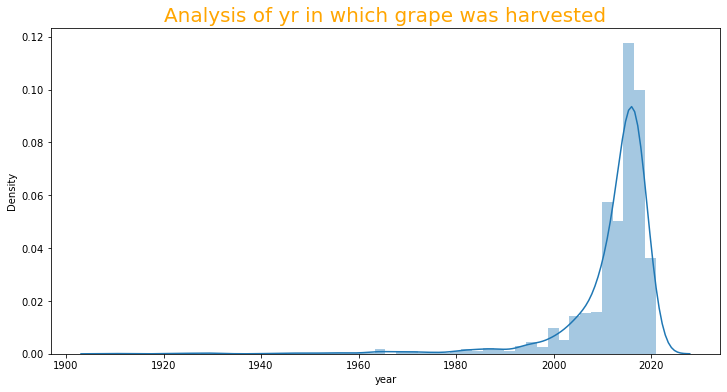

In [843]:
plt.figure(figsize=(12,6))
sns.distplot(data_wine.year)
plt.title(f"Analysis of yr in which grape was harvested" , fontsize=20,
          color="orange")

*  Most of the wines are made of grapes which are harvested after 2000.

### ANALYSIS ON RATING

In [844]:
data_wine.rating.value_counts()

4.3    694
4.4    474
4.5    268
4.2    198
4.6    157
4.7     80
4.8     25
4.9      1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Analysis of rating')

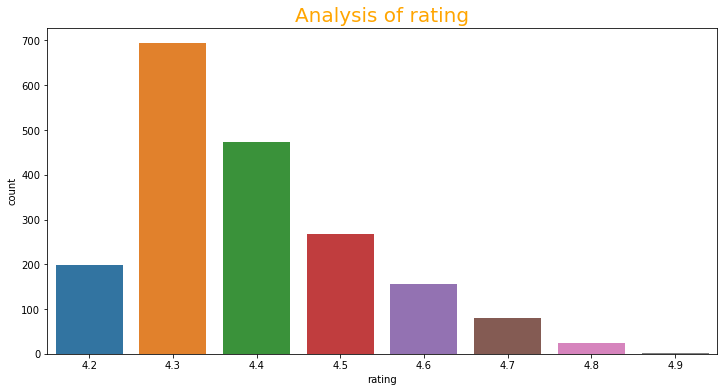

In [845]:
plt.figure(figsize=(12,6))
sns.countplot('rating',data=data_wine)
plt.title(f"Analysis of rating" , fontsize=20,
          color="orange")

* we can clearly see most of wine are rated between 4.3 and 4.5.

### ANALYSIS ON num_reviews

In [846]:
data_wine.num_reviews.value_counts()

28      26
27      25
32      23
35      21
25      20
        ..
185      1
2551     1
204      1
206      1
224      1
Name: num_reviews, Length: 752, dtype: int64

Text(0.5, 1.0, 'Analysis on number of users that reviewed wine')

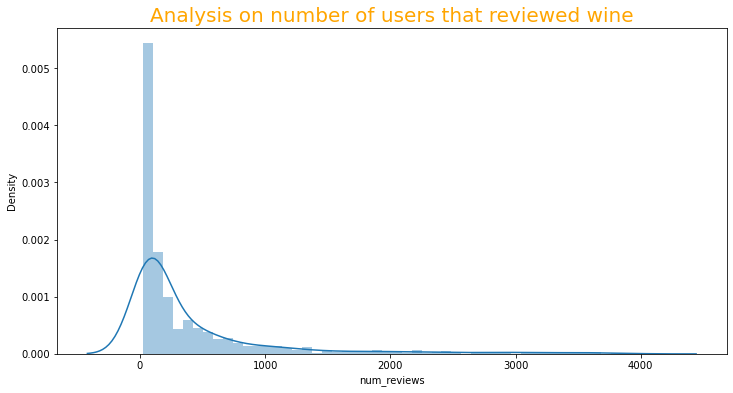

In [847]:
plt.figure(figsize=(12,6))
sns.distplot(data_wine.num_reviews)
plt.title(f"Analysis on number of users that reviewed wine" , fontsize=20,
          color="orange")

* Most of the wines are reviwed by 100 users or less than 100 as we can clearly see a very big spike there.

* As the dataset is of wines from spain ,so there is no need to review country column for all the records it will be Spain.
* We will drop the country column later in the preprocessing phase.

## Analysis on region

In [848]:
data_wine.region.value_counts().head(10)

Ribera del Duero      464
Rioja                 454
Priorato              228
Toro                   68
Castilla y Leon        51
Vino de Espana         44
Cava                   34
Rias Baixas            33
Jerez-Xeres-Sherry     28
Montilla-Moriles       26
Name: region, dtype: int64

* Majority of wines are coming from the 3 regions : Ribera del Duero,Rioja,Rioja.

### Analysis on price(Target variable)

Text(0.5, 1.0, 'Analysis on price of wine')

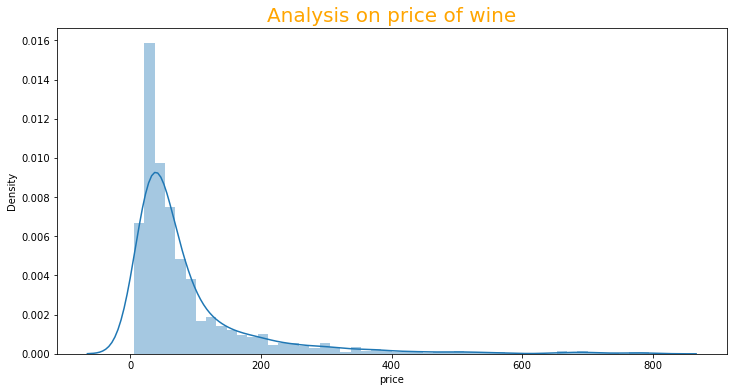

In [849]:
plt.figure(figsize=(12,6))
sns.distplot(data_wine.price)
plt.title(f"Analysis on price of wine" , fontsize=20,
          color="orange")

* Price of most of the wines less than 200.
* The above graph shows that price has right skewness. And we know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, so we should perform some operation to make it normal, in later part.

### Analysis on type

In [850]:
data_wine.type.value_counts()

Rioja Red               531
Ribera Del Duero Red    458
Priorat Red             216
Red                     200
Tempranillo              73
Toro Red                 64
Sherry                   55
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 33
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Tempranillo'),
  Text(1, 0, 'Ribera Del Duero Red'),
  Text(2, 0, 'Pedro Ximenez'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Sherry'),
  Text(5, 0, 'Toro Red'),
  Text(6, 0, 'Rioja Red'),
  Text(7, 0, 'Rioja White'),
  Text(8, 0, 'Grenache'),
  Text(9, 0, 'Priorat Red'),
  Text(10, 0, 'Cava'),
  Text(11, 0, 'Verdejo'),
  Text(12, 0, 'Syrah'),
  Text(13, 0, 'Monastrell'),
  Text(14, 0, 'Mencia'),
  Text(15, 0, 'Sparkling'),
  Text(16, 0, 'Montsant Red'),
  Text(17, 0, 'Albarino'),
  Text(18, 0, 'Chardonnay'),
  Text(19, 0, 'Cabernet Sauvignon'),
  Text(20, 0, 'Sauvignon Blanc')])

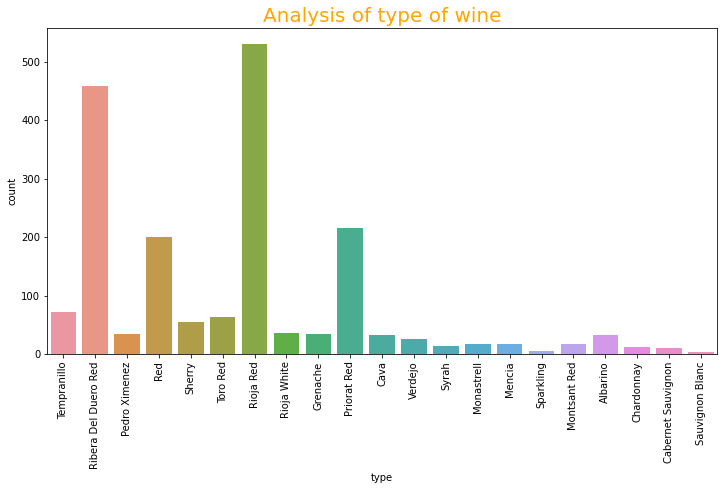

In [851]:
plt.figure(figsize=(12,6))
sns.countplot('type',data=data_wine)
plt.title(f"Analysis of type of wine" , fontsize=20,
          color="orange")
plt.xticks(rotation=90)


* 'Ribera Del Duero Red','Red','Rioja Red','Priorat Red' are some of the most availiable wine varities.
* In which 'Rioja Red' has most sales followed by 'Ribera Del Duero Red'.

### Analysis on body

In [852]:
data_wine.body.value_counts()

4.0    1208
5.0     550
3.0     105
2.0      34
Name: body, dtype: int64

Text(0.5, 1.0, 'Analysis of body score')

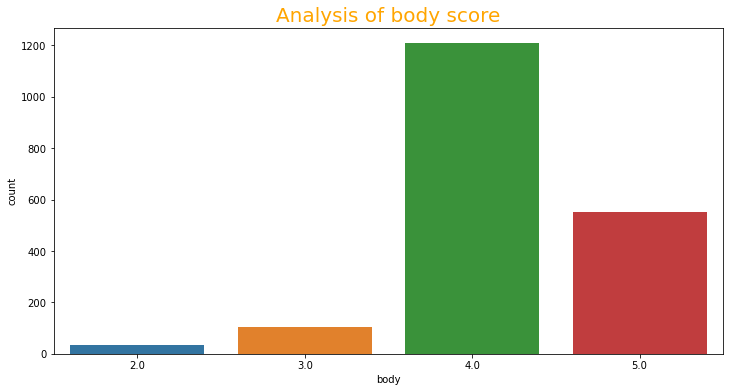

In [853]:
plt.figure(figsize=(12,6))
sns.countplot('body',data=data_wine)
plt.title(f"Analysis of body score" , fontsize=20,
          color="orange")

* Majority of the wine are rated 4 or 5 , which says wine from spain has good body score.

### Analysis on acidity

In [854]:
data_wine.acidity.value_counts()

3.0    1792
2.0      70
1.0      35
Name: acidity, dtype: int64

* More than 90 % of the wine has high acidity rating.

### Bivariate Analysis of year and price.

Text(0.5, 1.0, 'price V/s year')

<Figure size 1440x1440 with 0 Axes>

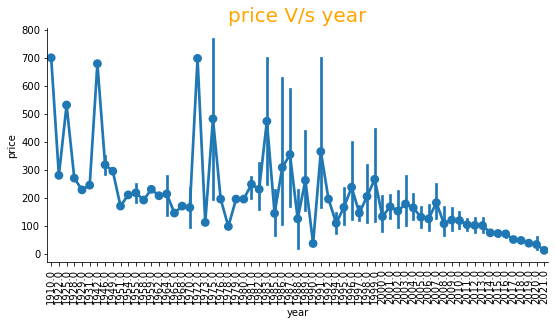

In [855]:
plt.figure(figsize=(20,20))
sns.factorplot(x='year',y='price',data=data_wine,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"price V/s year" , fontsize=20,
          color="orange")


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Bivariate Analysis of year and price')

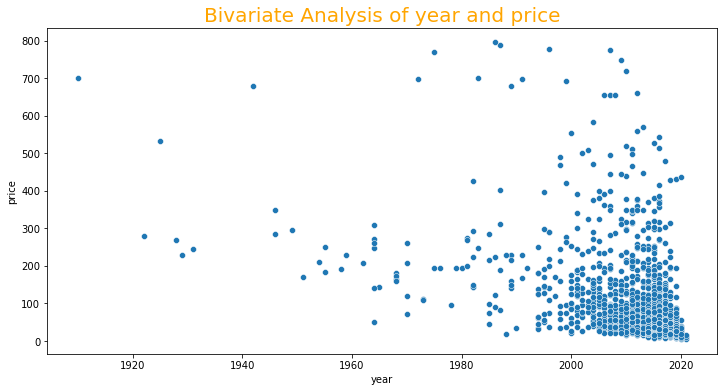

In [856]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['year'],data_wine['price']))
plt.title(f"Bivariate Analysis of year and price" , fontsize=20,
          color="orange")

* By looking at it we can say that prices of wines is low for wines which have grapes harvested about 20-30 years.
* But as the data range values after 1990 would be interesting to see.

Text(0.5, 1.0, 'price V/s year')

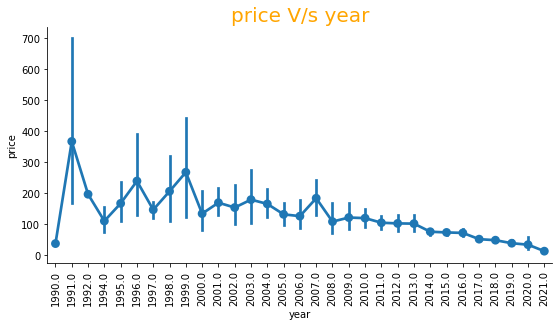

In [857]:
year_after_1990 = data_wine[data_wine["year"]>=1990]
sns.factorplot(x='year',y='price',data=year_after_1990,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"price V/s year" , fontsize=20,
          color="orange")


* There is clearly a downward trend , as time period is increasing price is decresing. 
* Old is Gold.

### Bivariate Analysis of year and rating

Text(0.5, 1.0, 'rating V/s price')

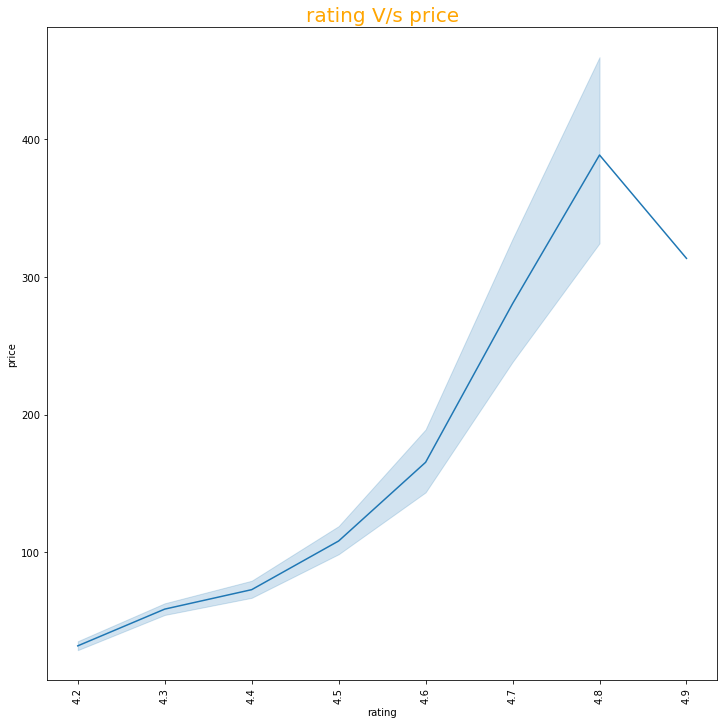

In [858]:
plt.figure(figsize=(12,12))
sns.lineplot(x='rating',y='price',data=data_wine)
plt.xticks(rotation=90)
plt.title(f"rating V/s price" , fontsize=20,
          color="orange")

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Bivariate Analysis of rating and price')

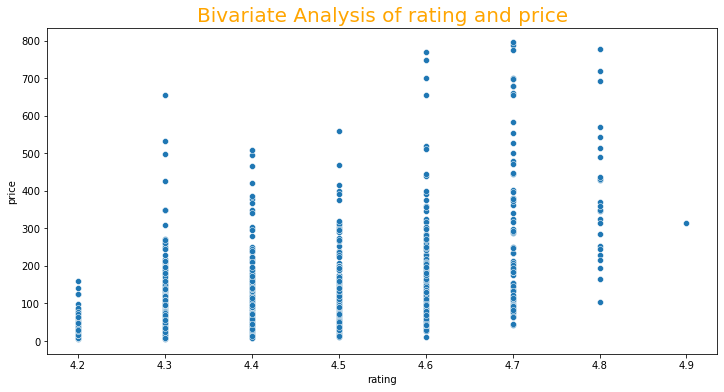

In [859]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['rating'],data_wine['price']))
plt.title(f"Bivariate Analysis of rating and price" , fontsize=20,
          color="orange")

* we can say that their is gradual increase in the price of wine with increase in ratings.(+ ve linear relation)
* we should also analyse the relation between number of years and ratings 

Text(0.5, 1.0, 'rating V/s year')

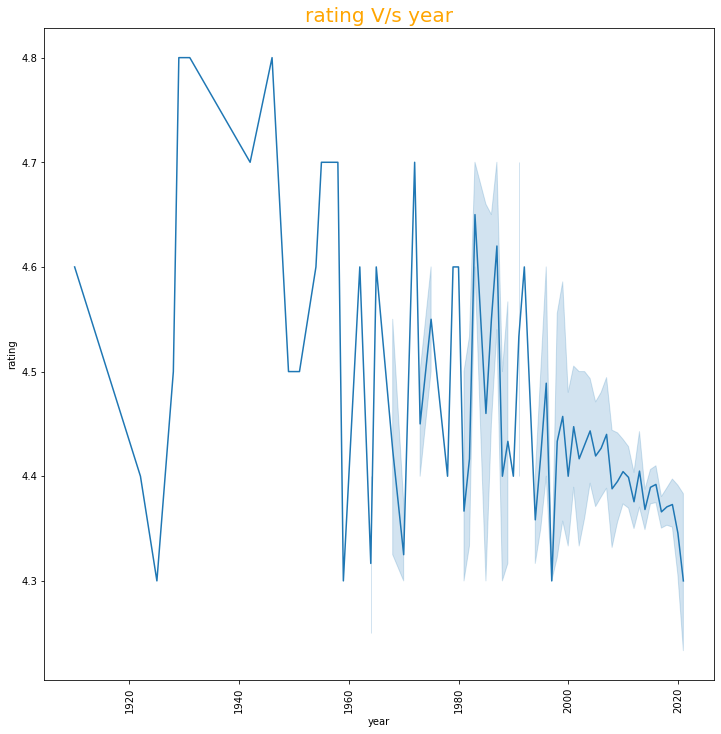

In [860]:
# Years and Ratings Analysis

plt.figure(figsize=(12,12))
sns.lineplot(y='rating',x='year',data=data_wine)
plt.xticks(rotation=90)
plt.title(f"rating V/s year" , fontsize=20,
          color="orange")

* Older Wine is more valuable than recent grapped ones

 ### Analysis of price and num_reviews

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Bivariate Analysis of number of reviews and price')

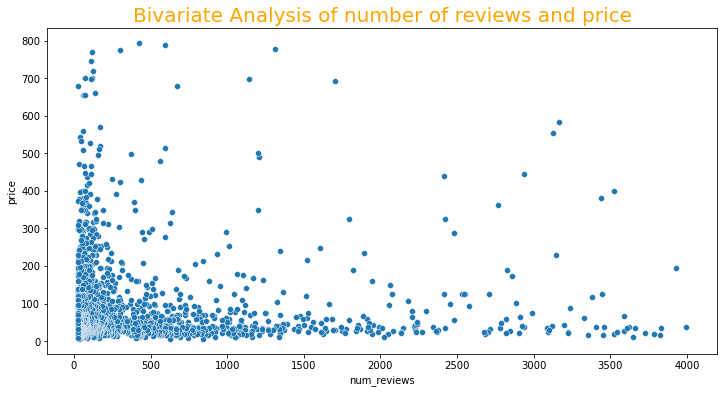

In [861]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['num_reviews'],data_wine['price']))
plt.title(f"Bivariate Analysis of number of reviews and price" , fontsize=20,
          color="orange")

* prices of wine is high, when the number of reviews are less. 
* as price is positively linearly related with rating ,we should check the relation between ratings and number of reviews.

Text(0.5, 1.0, 'num_reviews V/s ratings')

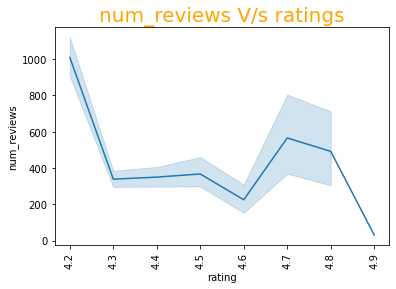

In [862]:
# Bivariate Analysis between number of reviews and ratings
sns.lineplot(x='rating',y='num_reviews',data=data_wine)
plt.xticks(rotation=90)
plt.title(f"num_reviews V/s ratings" , fontsize=20,
          color="orange")


* The more people review a wine, the less rating this wine get.

### Bivariate Analysis of price and region

In [863]:
top10 = data_wine.groupby('region')['price'].agg(['sum',"mean",'size']).reset_index().sort_values(by="sum",ascending=False).head(10)
top10

region           sum        mean  size
57    Ribera del Duero  53508.636821  115.320338   464
59               Rioja  39515.067861   87.037594   454
53            Priorato  23629.537420  103.638322   228
74      Vino de Espana   8589.350000  195.212500    44
69                Toro   5209.190000   76.605735    68
44    Montilla-Moriles   4645.930000  178.689615    26
15     Castilla y Leon   2661.137545   52.179168    51
34  Jerez-Xeres-Sherry   2405.020000   85.893571    28
35             Jumilla   2094.976654   80.576025    26
17                Cava   2021.290000   59.449706    34

Text(0.5, 1.0, 'Top 10 regions Sales Wise')

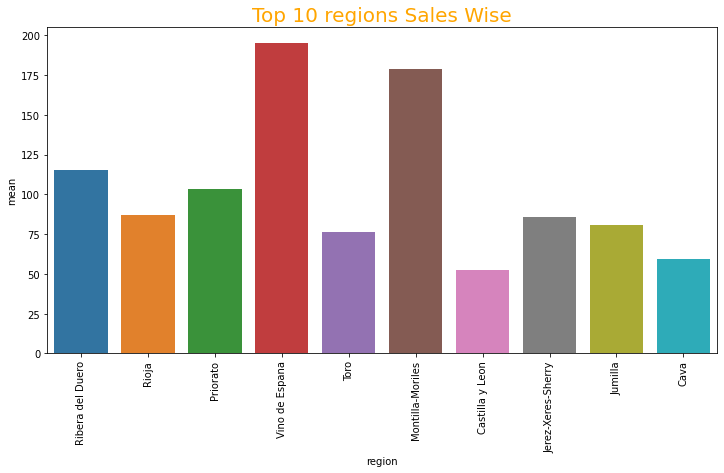

In [864]:
plt.figure(figsize=(12,6))
sns.barplot(x=top10['region'],y=top10['mean'])
plt.xticks(rotation=90)
plt.title(f"Top 10 regions Sales Wise" , fontsize=20,
          color="orange")

* These are the top 10 regions with highest sales of wine.

### Bivariate Analysis of price and type

Text(0.5, 1.0, 'Avg Sales of Wine type wise')

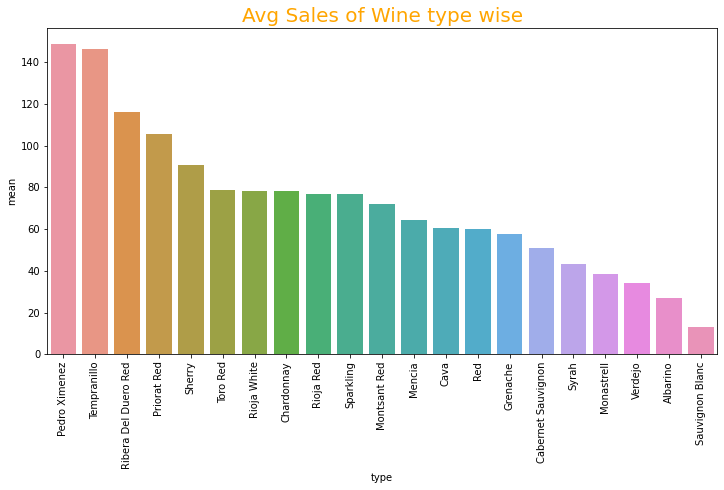

In [865]:
sorted_sales = data_wine.groupby('type')['price'].agg(['sum',"mean",'size']).reset_index().sort_values(by="mean",ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=sorted_sales['type'],y=sorted_sales['mean'],data = sorted_sales.sort_values(by="mean",ascending=False))
plt.xticks(rotation=90)
plt.title(f"Avg Sales of Wine type wise" , fontsize=20,
          color="orange")

### Bivariate Analysis of price and body

Text(0.5, 1.0, 'price V/s body score')

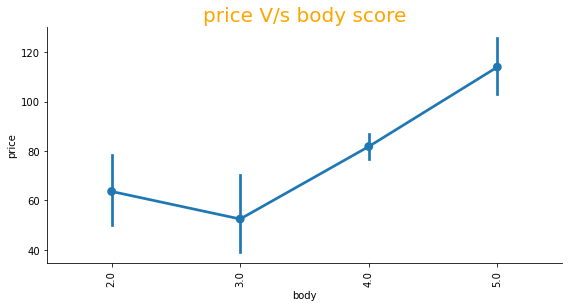

In [866]:
sns.factorplot(x='body',y='price',data=data_wine,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"price V/s body score" , fontsize=20,
          color="orange")


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Bivariate Analysis of body score and price')

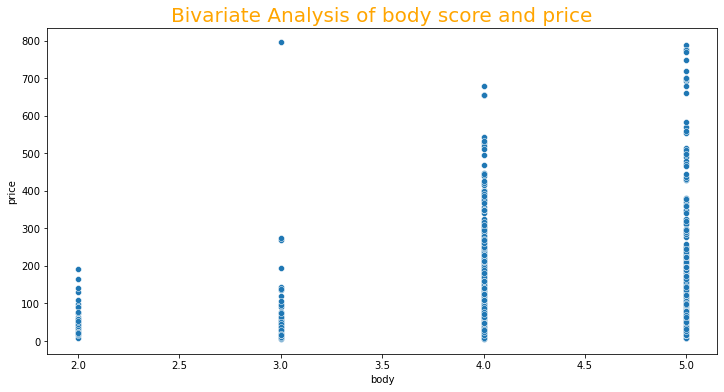

In [867]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['body'],data_wine['price']))
plt.title(f"Bivariate Analysis of body score and price" , fontsize=20,
          color="orange")

* Their is linear positive relation between body score and price.

### Bivariate Analysis of price and acidity

Text(0.5, 1.0, 'price V/s body score')

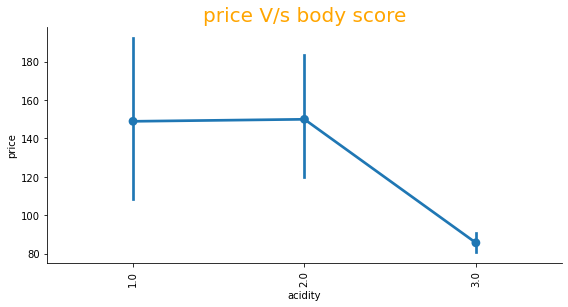

In [868]:
sns.factorplot(x='acidity',y='price',data=data_wine,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"price V/s body score" , fontsize=20,
          color="orange")


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Bivariate Analysis of body score and price')

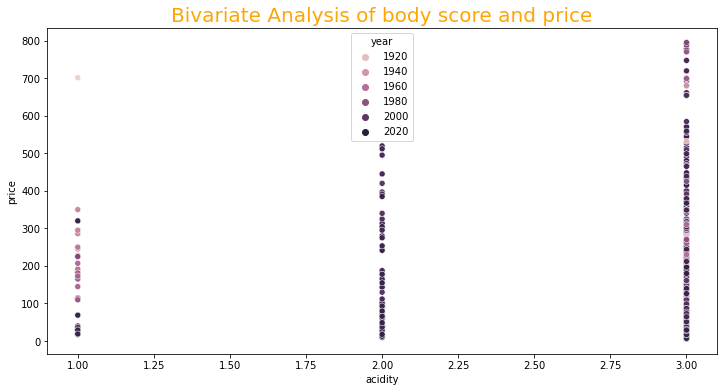

In [869]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['acidity'],data_wine['price'],hue=data_wine["year"]))
plt.title(f"Bivariate Analysis of body score and price" , fontsize=20,
          color="orange")

* Prices of wines having high acidity values is low because most of high acidity score wines are made of grapes that are harvested in recent past, as we have already concluded Older wine has higher price.

In [870]:
# corelatoin between the different features
corr = data_wine.corr(method ='pearson')
corr

year    rating  num_reviews     price      body   acidity
year         1.000000 -0.198919     0.056163 -0.443657 -0.074819  0.317822
rating      -0.198919  1.000000    -0.122533  0.538761  0.173004 -0.140928
num_reviews  0.056163 -0.122533     1.000000 -0.025894  0.112707  0.080760
price       -0.443657  0.538761    -0.025894  1.000000  0.153147 -0.127239
body        -0.074819  0.173004     0.112707  0.153147  1.000000 -0.111543
acidity      0.317822 -0.140928     0.080760 -0.127239 -0.111543  1.000000

Text(0.5, 1.0, 'Heatmap')

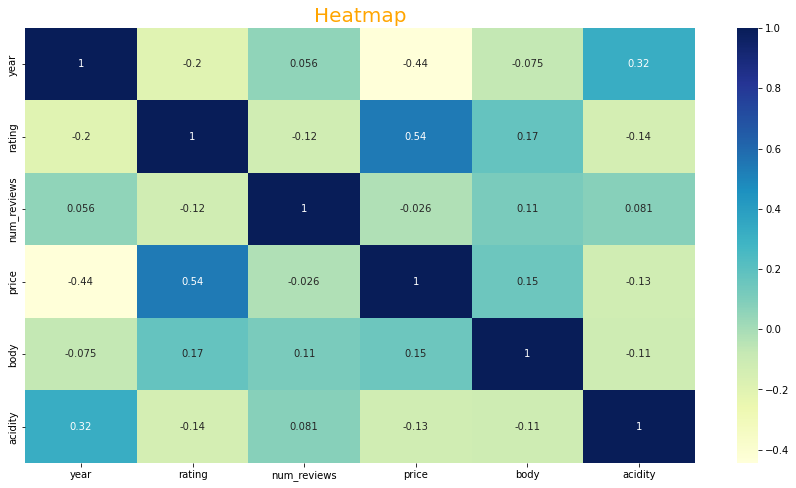

In [871]:
# Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.title(f"Heatmap" , fontsize=20,
          color="orange")

We have linear relationships in below featues as we got to know from above heatmap

* Their is high correlation between price and rating as already discussed.
* we also have moderate correlation between year and acidity.
* their is also moderate realtion between rating and year.
* Their is high - ve correlation between price and year.

## Conclusions from EDA

* wines are coming from 479 winery
* There are 836 wine names.
* Most of the wines are made of grapes which are harvested after 2000.
* we can clearly see most of wine are rated between 4.3 and 4.5.
* Most of the wines are reviwed by 100 users or less than 100 as we can clearly see a very big spike there.
* Majority of wines are coming from the 3 regions : Ribera del Duero,Rioja,Rioja.
* Price of most of the wines less than 200.
* 'Ribera Del Duero Red','Red','Rioja Red','Priorat Red' are some of the most availiable wine varities.
* In which 'Rioja Red' has most sales followed by 'Ribera Del Duero Red'.
* Majority of the wine are rated 4 or 5 , which says wine from spain has good body score.
* More than 90 % of the wine has high acidity rating.
* prices of wines is low for wines which have grapes harvested about 20-30 years.
* But as the data range values after 1990 would be interesting to see.There is clearly a downward trend , as time period is increasing price is decresing.**Old is Gold.
* we can say that their is gradual increase in the price of wine with increase in ratings.(+ ve linear relation),we have also analyse the relation between number of years and ratings.
* Older Wine is more valuable than recent grapped ones.
* prices of wine is high, when the number of reviews are less.As price is positively linearly related with rating ,we have also checked the relation between ratings and number of reviews.
* The more people review a wine, the less rating this wine get.
* Their is linear positive relation between body score and price.
* Prices of wines having high acidity values is low because most of high acidity score wines are made of grapes that are harvested in recent past, as we have already concluded Older wine has higher price.

## Data Preprocessing

### Dropping the country column 

In [872]:
data_wine.drop(columns=["country"],axis=1,inplace=True)

In [873]:
# verifying the change

data_wine.head()

winery           wine    year  rating  num_reviews            region  \
1        Artadi  Vina El Pison  2018.0     4.9           31    Vino de Espana   
2  Vega Sicilia          Unico  2009.0     4.8         1793  Ribera del Duero   
3  Vega Sicilia          Unico  1999.0     4.8         1705  Ribera del Duero   
4  Vega Sicilia          Unico  1996.0     4.8         1309  Ribera del Duero   
5  Vega Sicilia          Unico  1998.0     4.8         1209  Ribera del Duero   

    price                  type  body  acidity  
1  313.50           Tempranillo   4.0      2.0  
2  324.95  Ribera Del Duero Red   5.0      3.0  
3  692.96  Ribera Del Duero Red   5.0      3.0  
4  778.06  Ribera Del Duero Red   5.0      3.0  
5  490.00  Ribera Del Duero Red   5.0      3.0

### Identifying categorical variables

In [874]:
print('Categorical columns: ')
for col in data_wine.columns:
    if data_wine[col].dtype == 'object':
        print(str(col))

Categorical columns: 
winery
wine
region
type


In [875]:
#Import library:
from sklearn.preprocessing import LabelEncoder

var_mod = ["winery","wine","region","type"]
le = LabelEncoder()
for i in var_mod:
    data_wine[i] = le.fit_transform(data_wine[i])

In [876]:
# verifying changes

data_wine.head()

winery  wine    year  rating  num_reviews  region   price  type  body  \
1      33   813  2018.0     4.9           31      74  313.50    18   4.0   
2     446   772  2009.0     4.8         1793      57  324.95    11   5.0   
3     446   772  1999.0     4.8         1705      57  692.96    11   5.0   
4     446   772  1996.0     4.8         1309      57  778.06    11   5.0   
5     446   772  1998.0     4.8         1209      57  490.00    11   5.0   

   acidity  
1      2.0  
2      3.0  
3      3.0  
4      3.0  
5      3.0

## Feature Scaling
- Feature scaling is important for every algorithm where distance matter. Two famous techniques for Feature Scaling are:
1. Normalization
2. Standardization

Standardization is useful when the feature distribution is Normal or Gaussian, otherwise we do Normalization.

In [877]:
# we will perform standardization

data_wine = (data_wine-data_wine.mean())/data_wine.std()
data_wine.head()

winery      wine      year    rating  num_reviews    region     price  \
1 -1.430706  1.470907  0.590331  3.736375    -0.574791  1.426853  2.082914   
2  1.399291  1.303015 -0.269775  3.001725     2.047669  0.386740  2.189228   
3  1.399291  1.303015 -1.225447  3.001725     1.916695  0.386740  5.606215   
4  1.399291  1.303015 -1.512149  3.001725     1.327311  0.386740  6.396372   
5  1.399291  1.303015 -1.321015  3.001725     1.178477  0.386740  3.721723   

       type      body   acidity  
1  1.907574 -0.323380 -2.854102  
2 -0.014766  1.303814  0.227418  
3 -0.014766  1.303814  0.227418  
4 -0.014766  1.303814  0.227418  
5 -0.014766  1.303814  0.227418

## Creating test and train data

In [878]:
#Assigning the value in X and Y

X = data_wine.drop(columns = ["price"],axis=1)
y = (data_wine['price'])

In [879]:
X.head()

winery      wine      year    rating  num_reviews    region      type  \
1 -1.430706  1.470907  0.590331  3.736375    -0.574791  1.426853  1.907574   
2  1.399291  1.303015 -0.269775  3.001725     2.047669  0.386740 -0.014766   
3  1.399291  1.303015 -1.225447  3.001725     1.916695  0.386740 -0.014766   
4  1.399291  1.303015 -1.512149  3.001725     1.327311  0.386740 -0.014766   
5  1.399291  1.303015 -1.321015  3.001725     1.178477  0.386740 -0.014766   

       body   acidity  
1 -0.323380 -2.854102  
2  1.303814  0.227418  
3  1.303814  0.227418  
4  1.303814  0.227418  
5  1.303814  0.227418

In [880]:
y.head()

1    2.082914
2    2.189228
3    5.606215
4    6.396372
5    3.721723
Name: price, dtype: float64

In [881]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [882]:
print(X_train.shape)
print(X_test.shape)

(1327, 9)
(570, 9)


## Implementing Linear Regression

In [883]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [884]:
#checking the score
reg.score(X_train, y_train)

0.44022877383902237

In [885]:
#checking the coefficeint
reg.coef_

array([-0.00691196,  0.07013556, -0.3878567 ,  0.46398862,  0.04521189,
        0.06680769,  0.01475598,  0.00422639,  0.06384112])

In [886]:
#getting the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [887]:
#importing package
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 0.5661205333036149
RMSE : 0.7524098173891771
MAE : 0.46258871346964153
R2 : 0.44022877383902237
Adjusted R2 : 0.4312324505614352


Here r2 score value is 0.44 that means our model is not able to capture most of the data variance.

In [888]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [889]:
#importing package
from sklearn.metrics import mean_squared_error

#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score

#calculate r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2)

MSE : 0.5994417975083818
RMSE : 0.7742362672391302
MAE : 0.4768729719973168
R2 : 0.383030753723139
Adjusted R2 : 0.3731151765508324


The r2_score for the test set is 0.38, it means that our linear model is not performing well on the data.

In [890]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

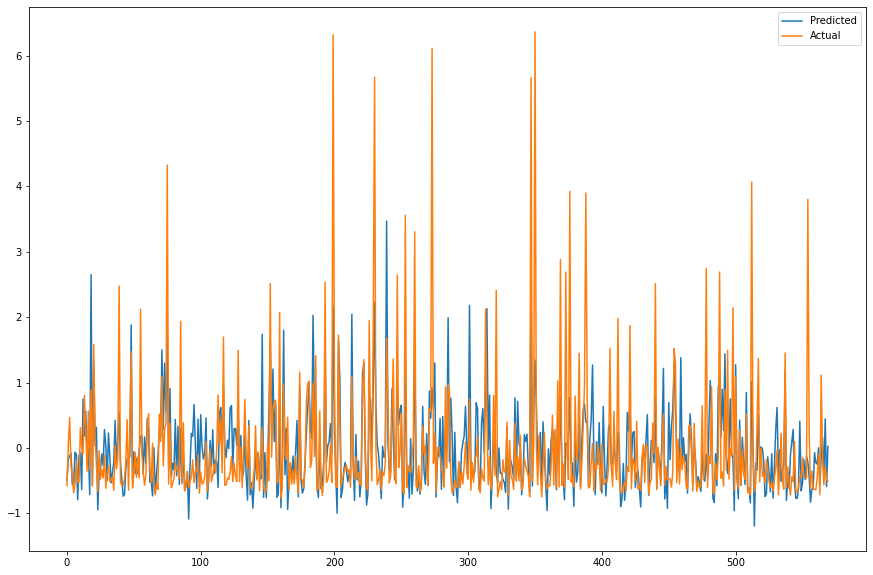

In [891]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

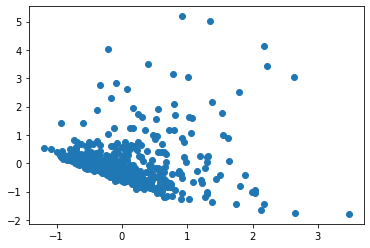

In [892]:
#Checking Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

## Implementing Lasso regression

In [893]:
#Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

-0.000364898529324309
0.0


In [894]:
#getting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.0113426822349947
RMSE : 1.0056553496277911
MAE : 0.6395803982226921
R2 : 0.0
Adjusted R2 : -0.016071428571428514


Here r2 score is 0.0 so it means that our model is not able to capture any of the data variance.

In [895]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [896]:
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.9719455816596964
RMSE : 0.9858730048336329
MAE : 0.6255120612090623
R2 : -0.000364898529324309
Adjusted R2 : -0.016442191541402584


The r2_score for the test set is 0.0 it means that our linear model is performing terribly on the data.

In [897]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

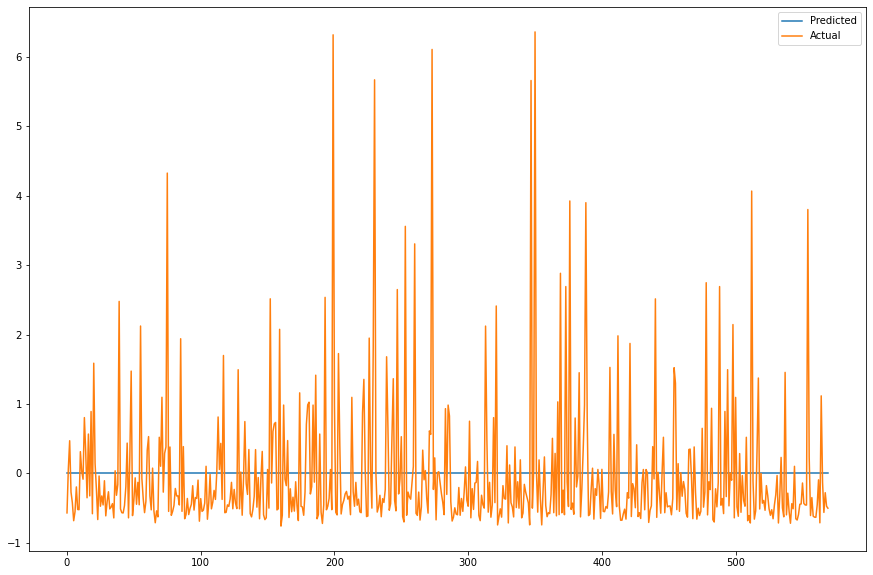

In [898]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

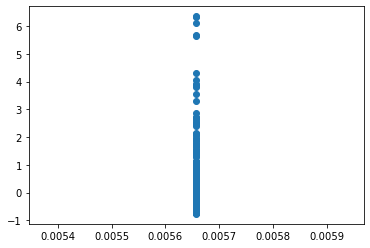

In [899]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

## Implementing Ridge Regression

In [900]:
#importing package
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [901]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [902]:
#checking score
ridge.score(X_train, y_train)

0.44022877167350105

In [903]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [904]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.5661205354936991
RMSE : 0.752409818844557
MAE : 0.46258215923137685
R2 : 0.44022877167350105
Adjusted R2 : 0.43123244836111096


Here r2 score is 0.44 so it means that our model is not able to capture most of the data variance.

In [905]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [906]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.5994364105395716
RMSE : 0.7742327883392511
MAE : 0.4768619800268675
R2 : 0.38303629820485574
Adjusted R2 : 0.37312081014029097


Here the r2_score for the test set is 0.38 it means that our linear model is not performing well on the data.

In [907]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

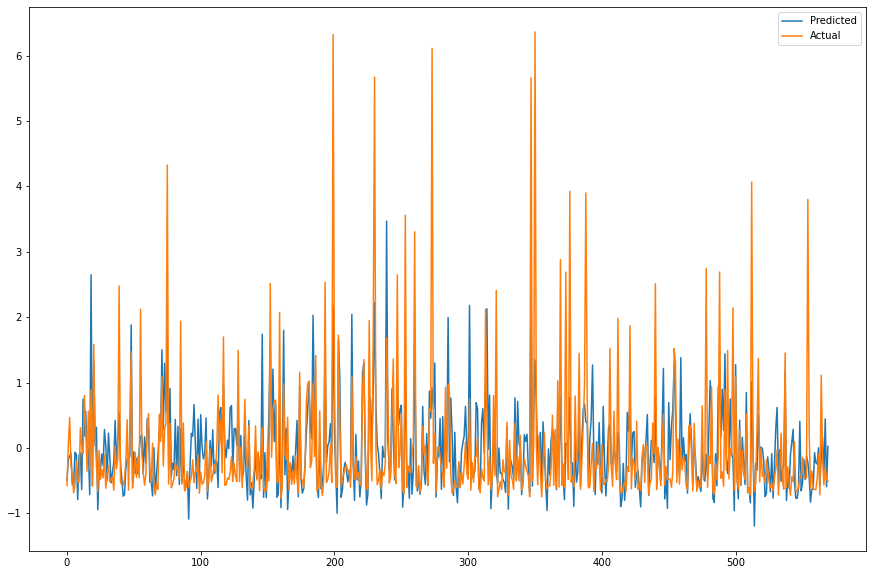

In [908]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

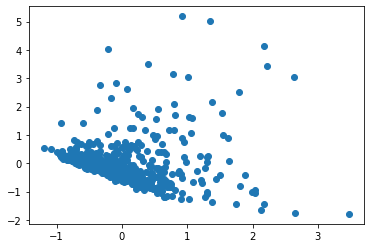

In [909]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

## Implementing ElasticNet Regression

In [910]:
#importing package
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [911]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [912]:
#checking score
elasticnet.score(X_train, y_train)

0.4227952708624477

In [913]:
#getting X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [914]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.5837517789646957
RMSE : 0.7640365036859794
MAE : 0.4550330442090808
R2 : 0.4227952708624477
Adjusted R2 : 0.4135187662870228


Here r2 score value is 0.42 it means that our model is not able to capture most of the data variance

In [915]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [916]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.6018597579595234
RMSE : 0.7757962090391545
MAE : 0.4564475326289548
R2 : 0.3805420930336961
Adjusted R2 : 0.37058651952888055


Here r2_score for the test set is 0.38 it means that our linear model is not performing well on the data

In [917]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

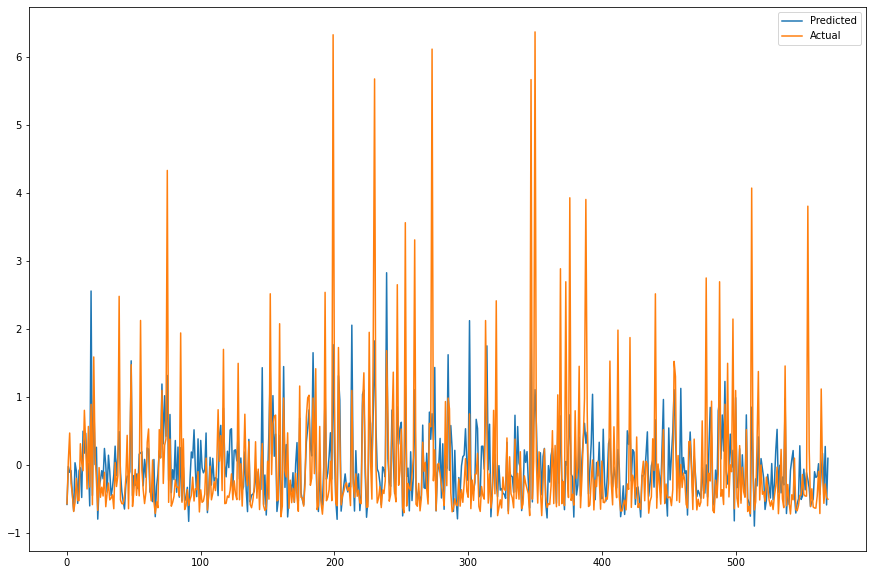

In [918]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

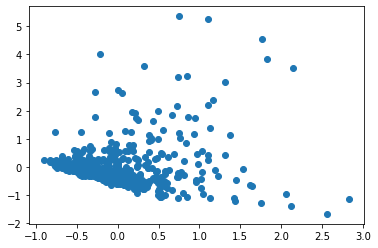

In [919]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

## Implementing Decision Tree Regression

In [920]:
#importing package
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [921]:
#getting the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [922]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE)


#importing packages
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_d)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.8196985890630756
MSE : 0.18234651254770318
RMSE : 0.42702050600375524
MAE : 0.2545721331060562
R2 : 0.8196985890630756
Adjusted R2 : 0.816800887815875


Here r2 score value is 0.82 it means that our model is able to capture most of the data variance.

In [923]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [924]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.6949904943076135
RMSE : 0.8336608988717256
MAE : 0.45820685511128567
R2 : 0.28468824959347994
Adjusted R2 : 0.27319216789051803


The r2_score for the test set is 0.28 it means that our linear model is not performing well on the data.

In [925]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

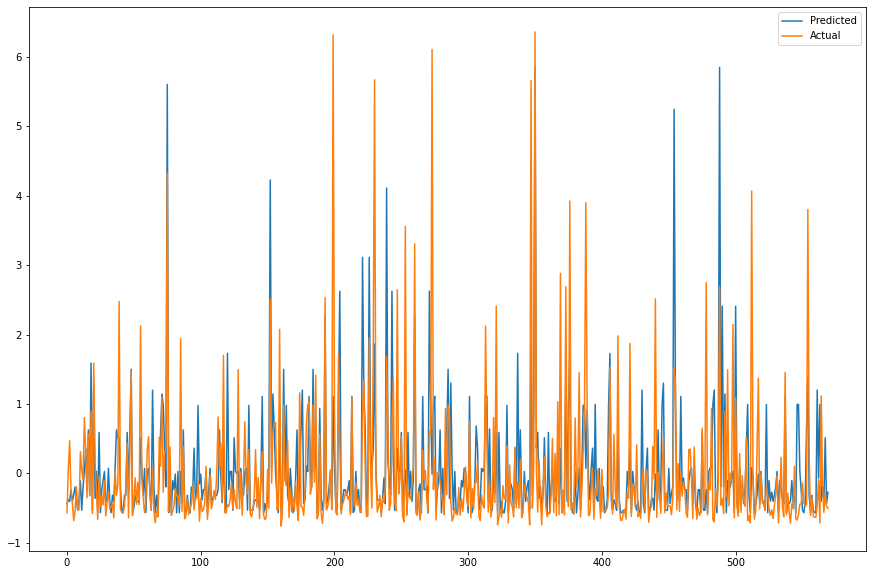

In [926]:
#Ploting figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

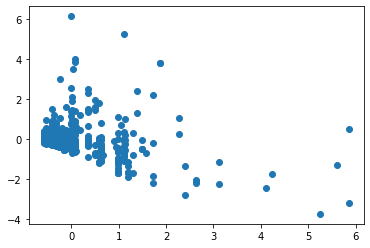

In [927]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

## Implementing Random Forest Regression

In [928]:
#importing package
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [929]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [930]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE)


#importing packages
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_r)
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9409007636731821
MSE : 0.05976958018480379
RMSE : 0.24447817936332025
MAE : 0.13830016745900756
R2 : 0.9409007636731821
Adjusted R2 : 0.9399509545179296


Here r2 score value is 0.94 it means that our model is able to capture most of the data variance.

In [931]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [932]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.3915462043588231
RMSE : 0.6257365295064873
MAE : 0.36571018686626594
R2 : 0.5970051344601958
Adjusted R2 : 0.5905284312640204


The r2_score for the test set is 0.59 it means that our linear model is performing well on the data.

In [933]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [934]:
rf_model.feature_importances_

array([0.07183319, 0.18481602, 0.24253373, 0.32178593, 0.10052801,
       0.03912289, 0.02676269, 0.00859226, 0.00402527])

In [935]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

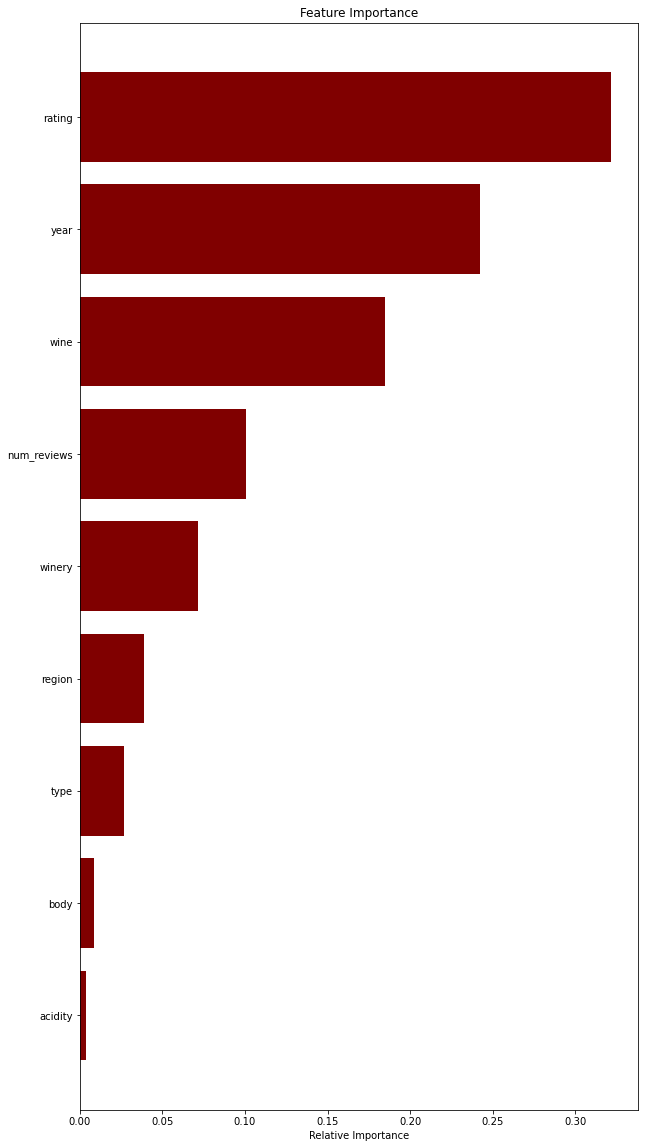

In [936]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Implementing Gradient Boosting Regression

In [937]:
#importing package
from sklearn.ensemble import GradientBoostingRegressor
# Creating an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [938]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [939]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_g)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.7848573778418377
MSE : 0.21758291655650577
RMSE : 0.46645784006328567
MAE : 0.28412508338544173
R2 : 0.7848573778418377
Adjusted R2 : 0.781399728557153


Here r2 score value is 0.79 it means that our model is able to capture most of the data variance.

In [940]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [941]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.21758291655650577
RMSE : 0.46645784006328567
MAE : 0.36251696865521643
R2 : 0.5856162052044656
Adjusted R2 : 0.5789564656452517


The r2_score for the test set is 0.59 it means that our linear model is performing well on the data

In [942]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [943]:
gb_model.feature_importances_

array([0.04344656, 0.16553303, 0.25968751, 0.40447935, 0.06013454,
       0.03784873, 0.01900433, 0.00846736, 0.0013986 ])

In [944]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [945]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

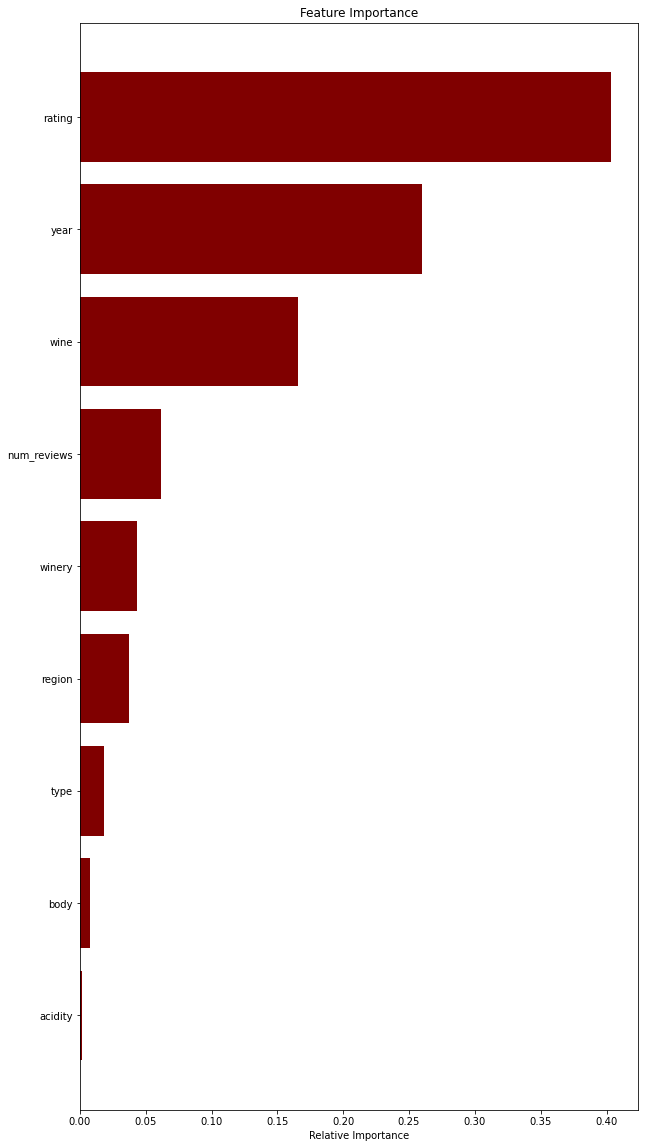

In [946]:
#Ploting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Implementing XGBoost

In [947]:
#importing package
from xgboost import XGBRegressor

# Creating an instance of the GradientBoostingRegressor
xgb_model  = XGBRegressor()

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [948]:
# Making predictions on train and test data

y_pred_train_xg = xgb_model.predict(X_train)
y_pred_test_xg = xgb_model.predict(X_test)

In [949]:
#importing package
from sklearn.metrics import mean_squared_error
print("Model Score:",xgb_model.score(X_train,y_train))
#calculating MSE
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train_xg)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.9943006341448662
MSE : 0.005764011950969495
RMSE : 0.07592109029096919
MAE : 0.050531420647019626
R2 : 0.9943006341448662
Adjusted R2 : 0.9942090371936231


Here r2 score value is 0.99 it means that our model is able to capture most of the data variance.

In [950]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':' Xtreme Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [951]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test_xg)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_test_xg))
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.005764011950969495
RMSE : 0.07592109029096919
MAE : 0.3584363445478708
R2 : 0.5842106995064704
Adjusted R2 : 0.5775283714628244


The r2_score for the test set is 0.59 it means that our model is performing well on the data

In [952]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Xtreme Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
test_df=test_df.append(dict2,ignore_index=True)


In [953]:
xgb_model.feature_importances_

array([0.0373779 , 0.08883318, 0.11043239, 0.49628472, 0.03496451,
       0.06412085, 0.03815978, 0.05256013, 0.0772666 ], dtype=float32)

In [954]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [955]:
features = X_train.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

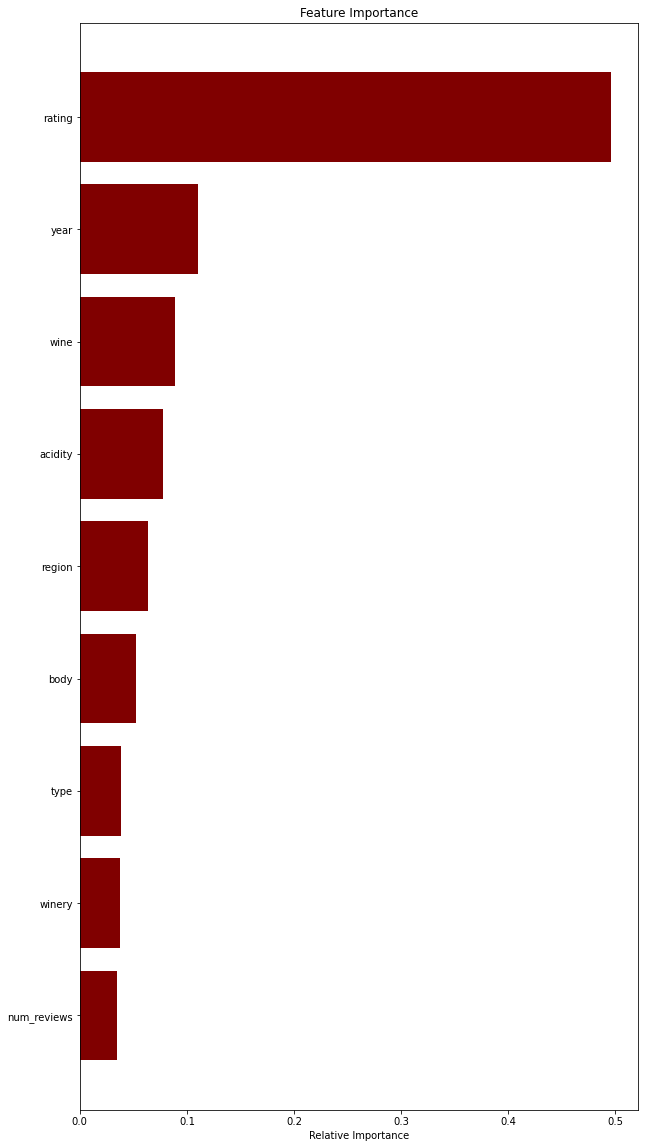

In [956]:
#Ploting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Hyperparameter tuning

## Now, let us try to tune some hyperparameters and see if the performance of our model improves.

## Gradient Boosting Regressor with GridSearchCV

In [957]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [958]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [959]:
#importing package
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, min_sam

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=8

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [960]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [961]:
gb_optimal_model = gb_grid.best_estimator_

In [962]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [963]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [964]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.7630183607810125
MSE : 0.23966964664817667
RMSE : 0.4895606669741521
MAE : 0.28346061690457464
R2 : 0.7630183607810125
Adjusted R2 : 0.7592097272935645


In [965]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [966]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.36971918013976135
RMSE : 0.6080453767111147
MAE : 0.3647398193451252
R2 : 0.6194703725147928
Adjusted R2 : 0.613354717787352


The r2_score for the test set is 0.62 it means that our model is performing well on the data

In [967]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [968]:
gb_optimal_model.feature_importances_

array([0.08042854, 0.16107413, 0.25625708, 0.40499034, 0.05576845,
       0.01803804, 0.01814823, 0.00402133, 0.00127386])

In [969]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [970]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

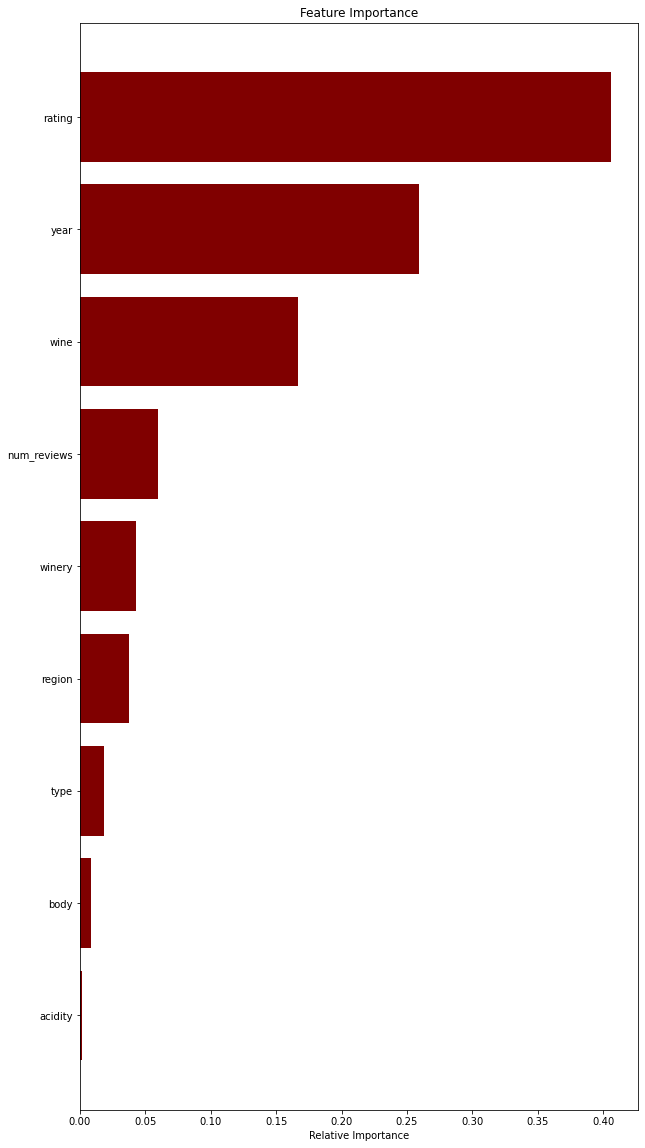

In [971]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Random Forest Regressor with Hyperparameter Tuning

In [972]:
print("Parameters currently in use:\n")
print(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Random Search with Cross Validation

In [973]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [974]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [975]:
# Fit the random search model
rf_random.fit(X_train,y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [976]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [977]:
rf_random_best = rf_random.best_estimator_

In [978]:
# Making predictions on train and test data

y_pred_train_r_f  = rf_random_best.predict(X_train)
y_pred_r_f = rf_random_best.predict(X_test)

In [979]:
print("Model Score:",rf_random_best.score(X_train,y_train))
MSE_rfh= mean_squared_error(y_train, y_pred_train_r_f)
print("MSE :",MSE_rfh)

RMSE_rfh=np.sqrt(MSE_rfh)
print("RMSE :",RMSE_rfh)


MAE_rfh= mean_absolute_error(y_train, y_pred_train_r_f)
print("MAE :",MAE_rfh)


r2_rfh= r2_score(y_train, y_pred_train_r_f)
print("R2 :",r2_rfh)
Adjusted_R2_rfh = (1-(1-r2_score(y_train, y_pred_train_r_f))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_f))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.9431554662842566
MSE : 0.05748930319847752
RMSE : 0.23976927075519397
MAE : 0.11631760311921624
R2 : 0.9431554662842566
Adjusted R2 : 0.9422418934209679


The r2_score for the train set is 0.94 it means that our  model is performing really well on the data

In [980]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression gridsearchcv ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [981]:
#importing package
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error(y_test, y_pred_r_f)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_r_f)
print("MAE :",MAE)


#importing package
from sklearn.metrics import r2_score
#calculating r2 and adjusted r2
r2= r2_score((y_test), (y_pred_r_f))
print("R2 :",r2)
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_r_f)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_r_f)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.3801751701086991
RMSE : 0.6165834656465409
MAE : 0.34814447323753167
R2 : 0.6087086534003966
Adjusted R2 : 0.6024200424729029


The r2_score for the train set is 0.60 it means that our  model is performing satisfactory on the data

In [982]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random Forest gridsearchcv ',
       'MAE':round((MAE_rfh),3),
       'MSE':round((MSE_rfh),3),
       'RMSE':round((RMSE_rfh),3),
       'R2_score':round((r2_rfh),3),
       'Adjusted R2':round((Adjusted_R2_rfh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

# XGBOOST REGRESSOR with Hyperparameter Tuning

In [984]:
print("Parameters currently in use:\n")
print(xgb_model.get_params())

Parameters currently in use:

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


## Grid Search CV with Cross Validation

In [986]:
# Maximum depth of trees
max_depth = [5,6,7,9]

# Number of trees
n_estimators = [200,300,400]

# learning rate
learning_rate = [0.1,0.150,0.3]

colsample_bytree = [0.5,0.8,1]

subsample = [0.6,0.8,1]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'learning_rate' : learning_rate,
              'colsample_bytree' : colsample_bytree,
                 'subsample': subsample}


In [987]:
# Create an instance of the  Xtreme GradientBoostingRegressor
xgb_model = XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] EN

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=400

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estima

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=400, 

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsamp

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, s

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=9, n_estimators=200, subsample

[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5,

[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=5, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estim

[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=6,

[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=7, n_e

[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.125, max_depth=9, n_e

[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=5, n_estima

[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=6, n_estimators=200

[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=7, n_estima

[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.15, max_depth=9, n_estimators=200, 

[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsa

[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=400, sub

[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=9, n_estimators=400, subsample

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=300

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimato

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsamp

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=100,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=6, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, s

[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=5, n_est

[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=6,

[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=7, n_estimat

[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.125, max_depth=9,

[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=5, n_estimators=200, 

[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, n_estimators=400, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators

[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=7, n_estimators

[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=9, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=6, n_estimators=300,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=300, subsamp

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=200, s

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, 

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=300, sub

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=300, subsample

[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=5,

[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=6, n_est

[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=7, n_e

[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9,

[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimato

[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=6, n_estimators=400, 

[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=7, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.15, max_depth=9, n_estimators=300

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=200, s

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=200, subsample

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1; t

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimators=400, subsampl

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; t

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1;

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; to

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.6; total time= 

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total 

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; to

[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=5, n_estimators=200, subsample

[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=100,

[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=6, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=100, s

[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=7, n_estimators=400, subsamp

[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.125, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=300, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=400, subsample=0.6; tot

[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=6, n_estimators=300, subsample=

[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=7, n_estimators=300, subsampl

[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.15, max_depth=9, n_estimators=300, subsample=0.6; tot

[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1; tota

[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=200, subsample=0.7; to

[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time= 

[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1; tota

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.6, 0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.125, 0.15, 0.3],
                         'max_depth': [5, 6, 7, 9],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.6, 0.7, 0.8, 1]},
             verbose=2)

In [988]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [989]:
xgb_optimal_model = xgb_grid.best_estimator_

In [990]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200,
 'subsample': 0.8}

In [991]:
# Making predictions on train and test data

y_pred_train_xg_b = xgb_optimal_model.predict(X_train)
y_pred_xg_b= xgb_optimal_model.predict(X_test)

In [993]:
from sklearn.metrics import mean_squared_error
print("Model Score:",xgb_optimal_model.score(X_train,y_train))
MSE_xgbh= mean_squared_error(y_train, y_pred_train_xg_b)
print("MSE :",MSE_xgbh)

RMSE_xgbh=np.sqrt(MSE_xgbh)
print("RMSE :",RMSE_xgbh)


MAE_xgbh= mean_absolute_error(y_train, y_pred_train_xg_b)
print("MAE :",MAE_xgbh)


from sklearn.metrics import r2_score
r2_xgbh= r2_score(y_train, y_pred_train_xg_b)
print("R2 :",r2_xgbh)
Adjusted_R2_xgbh = (1-(1-r2_score(y_train, y_pred_train_xg_b))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg_b))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.979928714333636
MSE : 0.020298947881725364
RMSE : 0.14247437622858844
MAE : 0.0960086995867566
R2 : 0.979928714333636
Adjusted R2 : 0.9796061400997124


In [994]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Xtreme Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_xgbh),3),
       'MSE':round((MSE_xgbh),3),
       'RMSE':round((RMSE_xgbh),3),
       'R2_score':round((r2_xgbh),3),
       'Adjusted R2':round((Adjusted_R2_xgbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [996]:
MSE_xgbh= mean_squared_error(y_test, y_pred_xg_b)
print("MSE :",MSE_xgbh)

RMSE_xgbh=np.sqrt(MSE_xgbh)
print("RMSE :",RMSE_xgbh)


MAE_xgbh= mean_absolute_error(y_test, y_pred_xg_b)
print("MAE :",MAE_xgbh)


from sklearn.metrics import r2_score
r2_xgbh= r2_score((y_test), (y_pred_xg_b))
print("R2 :",r2_xgbh)
Adjusted_R2_xgbh = (1-(1-r2_score(y_test, y_pred_xg_b))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_xg_b)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.3075992693612239
RMSE : 0.5546163262663875
MAE : 0.32807351701163545
R2 : 0.6834066457128328
Adjusted R2 : 0.6783185382332176


In [997]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Xtreme Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_xgbh),3),
       'MSE':round((MSE_xgbh),3),
       'RMSE':round((RMSE_xgbh),3),
       'R2_score':round((r2_xgbh),3),
       'Adjusted R2':round((Adjusted_R2_xgbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [998]:
xgb_optimal_model.feature_importances_

array([0.07947867, 0.14361024, 0.13296077, 0.22976765, 0.05823742,
       0.05971956, 0.0407512 , 0.04495616, 0.21051832], dtype=float32)

In [1001]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [1002]:
features = X_train.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

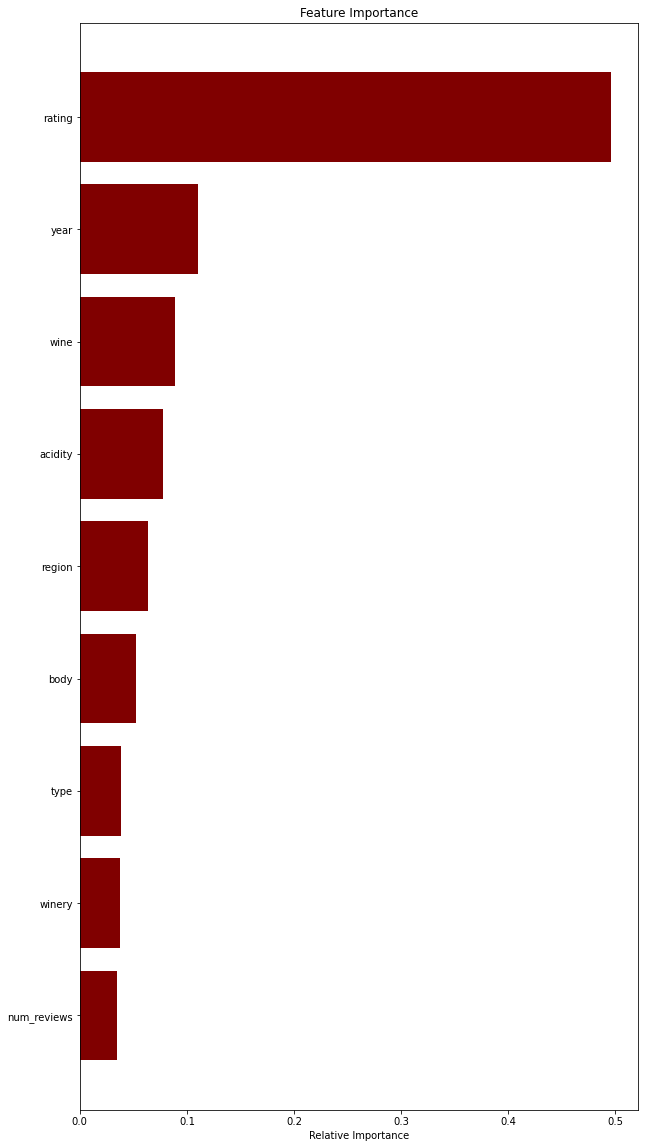

In [1003]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='maroon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## CONCLUSION

## In our analysis, we initially did EDA on all the features of our datset. One of the important insight was the relation between number of year and price(target variable). Next we analysed categorical variable and dropped off the irrelevant columns. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features and label encoded the categorical variables.

## Next we implemented 8 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest , GBoost and XGBoost. We did hyperparameter tuning to improve our model performance. Following are the results of our evaluation:

In [1004]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE    MSE   RMSE  \
Training set 0                       Linear regression   0.463  0.566  0.752   
             1                        Lasso regression   0.640  1.011  1.006   
             2                        Ridge regression   0.463  0.566  0.752   
             3                  Elastic net regression   0.455  0.584  0.764   
             4                Dicision tree regression   0.255  0.182  0.427   
             5                Random forest regression   0.138  0.060  0.244   
             6            Gradient boosting regression   0.284  0.218  0.466   
             7     Xtreme Gradient boosting regression   0.051  0.006  0.076   
             8          Gradient Boosting gridsearchcv   0.283  0.240  0.490   
             9   Random forest regression gridsearchcv   0.358  0.006  0.076   
             10  Xtreme Gradient Boosting gridsearchcv   0.096  0.020  0.142   
Test set     0                       Linear regression   0.477  0.599  0.774   
             1                        Lasso regression   0.626  0.972  0.986   
             2                        Ridge regression   0.477  0.599  0.774   
             3              Elastic net regression Test  0.456  0.602  0.776   
             4                Dicision tree regression   0.458  0.695  0.834   
             5                Random forest regression   0.366  0.392  0.626   
             6            Gradient boosting regression   0.363  0.218  0.466   
             7     Xtreme Gradient boosting regression   0.358  0.006  0.076   
             8          Gradient Boosting gridsearchcv   0.365  0.370  0.608   
             9              Random Forest gridsearchcv   0.116  0.057  0.240   
             10  Xtreme Gradient Boosting gridsearchcv   0.328  0.308  0.555   

                 R2_score  Adjusted R2  
Training set 0      0.440         0.43  
             1      0.000        -0.02  
             2      0.440         0.43  
             3      0.423         0.41  
             4      0.820         0.82  
             5      0.941         0.94  
             6      0.785         0.78  
             7      0.994         0.99  
             8      0.763         0.76  
             9      0.584         0.58  
             10     0.980         0.98  
Test set     0      0.383         0.37  
             1     -0.000        -0.02  
             2      0.383         0.37  
             3      0.381         0.37  
             4      0.285         0.27  
             5      0.597         0.59  
             6      0.586         0.58  
             7      0.584         0.58  
             8      0.619         0.61  
             9      0.943         0.94  
             10     0.683         0.68

* overfitting is seen for random forest regression,gradient boosting,xtreme gradient boosting.

* Xtreme Gradient Boosting gridsearchcv gives the highest R2 score of 98% for Train Set and Gradient Boosting gridsearchcv gives the highest R2 score of 68% for Test set,which is decent.

* We can deploy this model.

# Final Conclusions

* The ensemble models have performed well compared to that of linear, Decision Tree.
* The best performance is given by the Xtreme Gradient boosting model.
* The top key features that drive the price of the wine are: rating,year,wine,acidity,region etc.
* We can conclude from above that xtreme gradient boosting GridSearchCV is giving better results compared to that of normal gradient boosting.
* The above data is also reinforced by the analysis done during bivariate analysis.